note: needs to be run with lower python because librosa doesn't work with 3.9

In [1]:
import re, sys
import nilearn
from nilearn import plotting, input_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/envs/streamlit37/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
sys.version

'3.7.9 (default, Aug 31 2020, 07:22:35) \n[Clang 10.0.0 ]'

In [3]:
fmri_data = np.load('../data_pieman/fmri_data_pieman.npy')
print(fmri_data.shape)

data = fmri_data.copy()
data = np.swapaxes(data, 0,1)
data = np.swapaxes(data, 1,2)
print(data.shape)

(68, 300, 293)
(300, 293, 68)


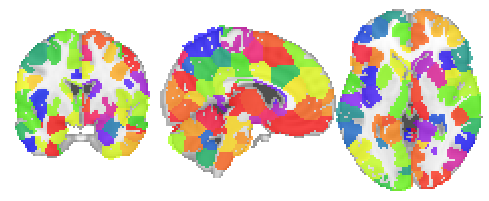

In [4]:
shen_file       = '../data_pieman/shen_2mm_268_parcellation.nii'

nilearn.plotting.plot_roi(shen_file, 
                  annotate = False, 
                  cut_coords = (5,0,0),
                  cmap = 'prism',
                  draw_cross = False, 
                  #title= 'Shen-268-node parcellation',
                 );
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);

sample_file = '../data_pieman/func.nii'
shen_masker.fit_transform(sample_file);

In [5]:
resmat_all = np.nanmean(data[:,:,:], axis =2)
resmat_all.shape

(300, 293)

In [6]:
audio_file = '/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/NARRATIVES/stimuli/pieman_audio.wav'

from scipy.io import wavfile
samplerate, wavdata = wavfile.read(audio_file)



In [7]:
#plt.figure(figsize = (20,2))
#plt.plot(wavdata[:,0])
##plt.figure(figsize = (20,2))
#plt.plot(ups*200000, linewidth=3)
#plt.show()

In [8]:
from pliers.extractors import RMSExtractor

# Create an instance of this extractor
ext = RMSExtractor(frame_length=2048)

# Extract features from the audio stimulus
rms_result = ext.transform(audio_file)

In [9]:
rms_result_df = rms_result.to_df()

In [10]:
rms_result_df.tail()

,order,duration,onset,object_id,rms
42183,42183,0.010667,449.952000,0,0.000018
42184,42184,0.010667,449.962667,0,0.000017
42185,42185,0.010667,449.973333,0,0.000018
42186,42186,0.010667,449.984000,0,0.000017
42187,42187,0.010667,449.994667,0,0.000017


In [12]:
#plt.figure(figsize = (20,2))
#rms_result_df['rms'].plot()
#plt.plot(ups, linewidth=3)

In [13]:
from scipy import signal
resampled_audio_feature = signal.resample(rms_result_df['rms'], 300)


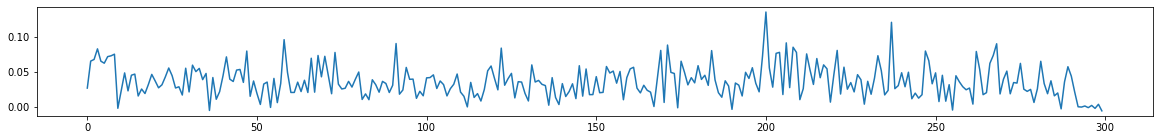

In [14]:
plt.figure(figsize = (20,2))
plt.plot(resampled_audio_feature)


In [15]:
len(rms_result_df['rms'])

42188

In [16]:
ups = signal.resample(resampled_audio_feature, len(wavdata) )

In [17]:
len(ups)

21600000

In [18]:
len(rms_result_df['rms'])

42188

In [19]:
len(wavdata)

21600000

In [20]:
samplerate

48000

In [21]:
len(wavdata)/samplerate

450.0

In [22]:
rms_result_df.tail()

,order,duration,onset,object_id,rms
42183,42183,0.010667,449.952000,0,0.000018
42184,42184,0.010667,449.962667,0,0.000017
42185,42185,0.010667,449.973333,0,0.000018
42186,42186,0.010667,449.984000,0,0.000017
42187,42187,0.010667,449.994667,0,0.000017


In [23]:
#shifted_resampled_audio_feature.shape

In [24]:
resampled_audio_feature[:-2].shape

(298,)

In [26]:
res = []
for i in range(268):
    res.append(np.corrcoef(resmat_all[2:,i], resampled_audio_feature[:-2])[0,1])

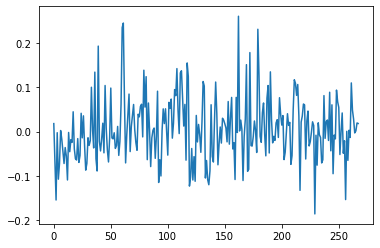

In [27]:
plt.plot(res)

In [28]:
np.argmax(res)

162

In [29]:
np.max(res)

0.2594524188254977

In [30]:
res = np.asarray(res)
res[res < 0.1] = 0

In [31]:
r2 = np.reshape(res, (1,268))
r2.shape

(1, 268)


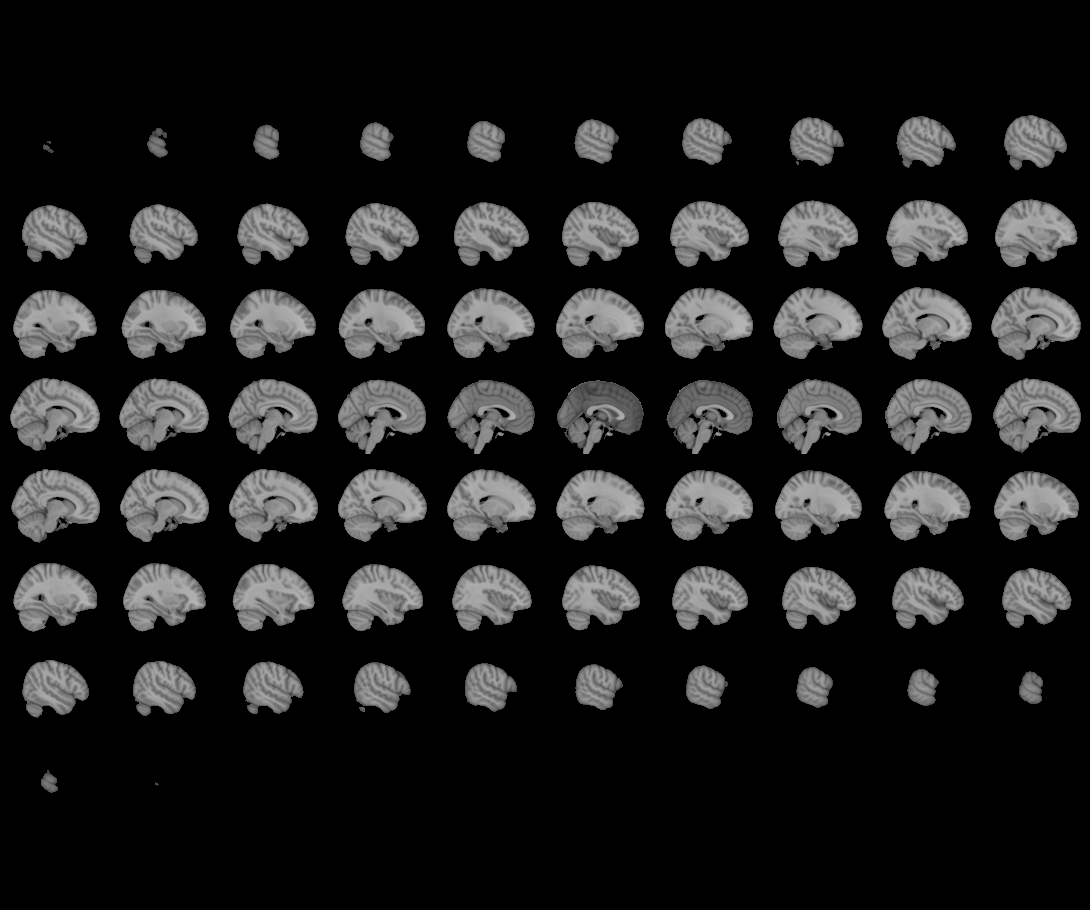
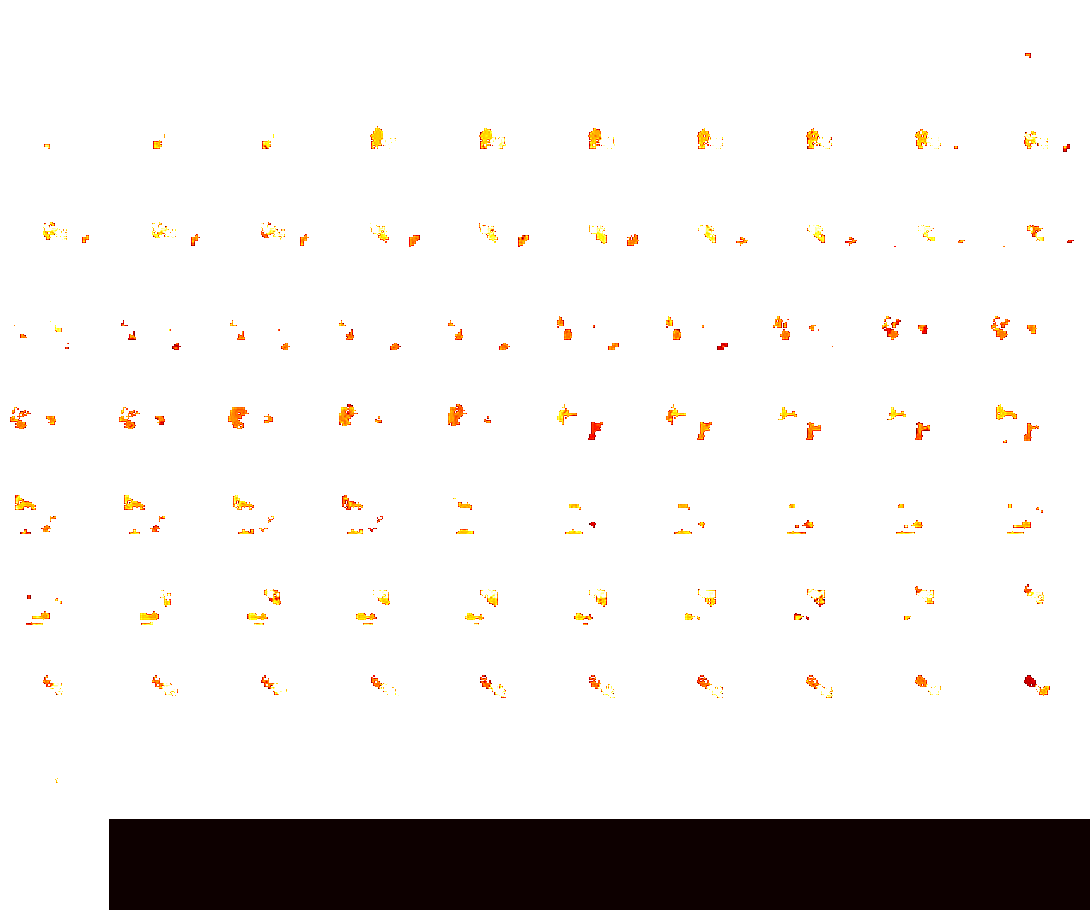

In [32]:


res_img = shen_masker.inverse_transform(r2);
view = nilearn.plotting.view_img(  nilearn.image.index_img(res_img,0), 
                                     threshold = 0.0, 
                                     vmax = 0.2, 
                              );
view


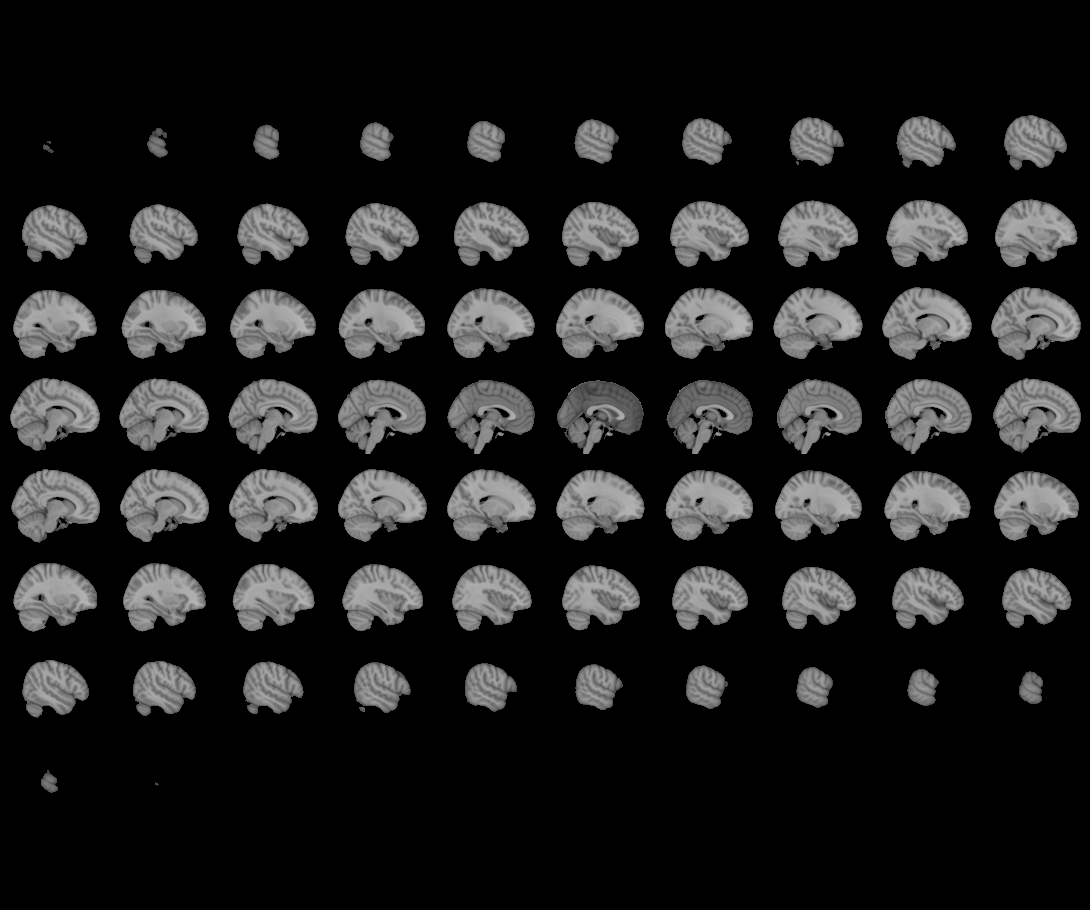
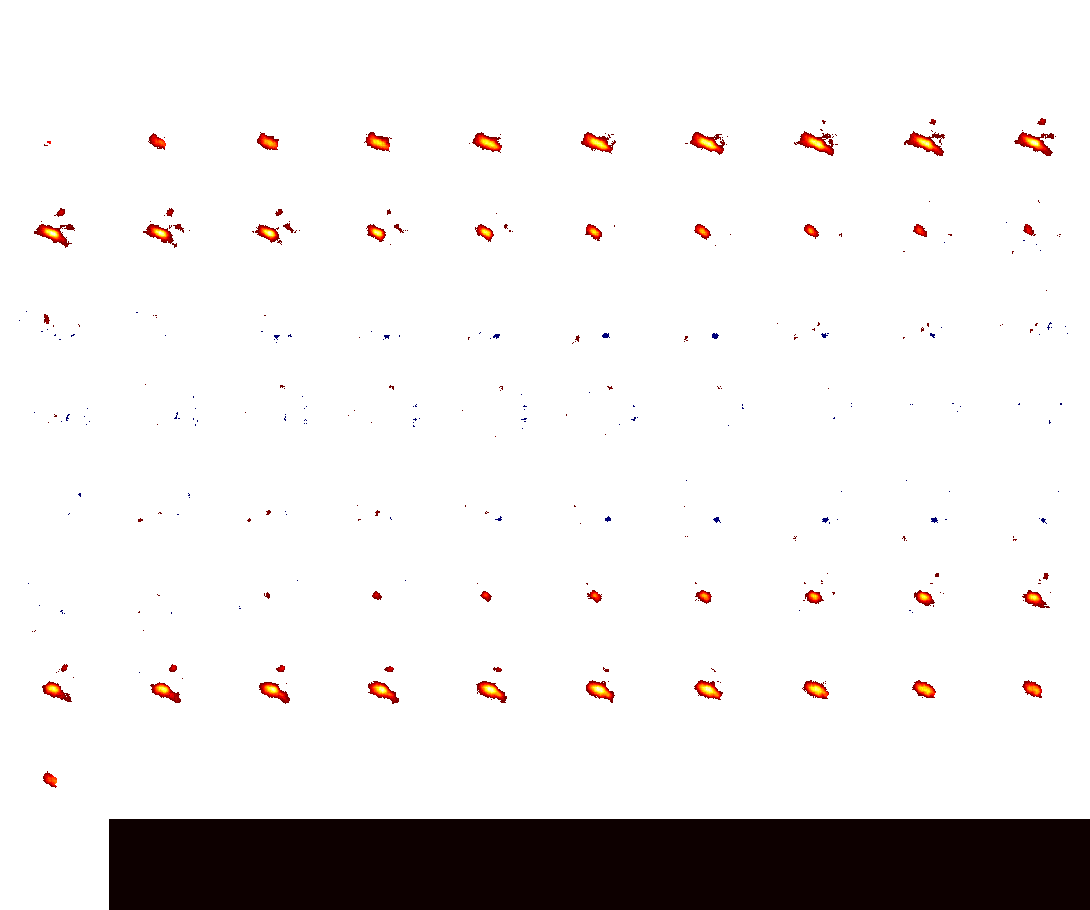

In [33]:

view = nilearn.plotting.view_img(  '../data_pieman/auditory_association-test_z_FDR_0.01.nii.gz', 
                                     threshold = 0.0, 
                                     #vmax = 0.2, 
                              );
view